# Proyecto 3. Analíticia Computacional
- Nicolas Ricaurte
- Juan Camilo Bello

#### Modelo predictivo para medir la probabilidad de obtener una beca del gobierno en el examen de estado de la educación superior (Saber 11) dadas las condiciones sociales

### Analisis exploratorio de datos

En Amazon athena, se implementaron las Queries para obtener subconjuntos de datos y sacar las siguientes estadisticas y visualizaciones:

- Query 1: Promedio de puntaje de acuerdo con la educación de los padres
- Query 2: Promedio de puntaje de acuerdo con el departamento
- Query 3: Promedio del puntaje de acuerdo con el estrato

- Query 4: Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el departamento
- Query 5: Cantidad de estudiantes que obtienen un puntaje mayor a 359 de acuerdo con el estrato

#### Finalmente se analizaron los datos en athena, notando la distribución de estos y se obtuvo la base de datos desde el 2019-1 en adelante para las columnas que queremos visualizar con el Query 6 y el Query 7 que corresponde unicamente a cundinamarca

#### Query 1

```SQL
SELECT fami_educacionpadre, fami_educacionmadre, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY fami_educacionpadre, fami_educacionmadre
```

#### Query 2

```SQL
SELECT estu_depto_reside, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY estu_depto_reside
```

#### Query 3
```SQL
SELECT fami_estratovivienda, AVG(punt_global) AS promedio_puntaje, STDDEV(punt_global) AS desviacion_estandar_puntaje
FROM saber11
GROUP BY fami_estratovivienda
```

#### Query 4
```SQL
SELECT estu_depto_reside, COUNT(*) AS cantidad_estudiantes, SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) AS cantidad_superan_puntaje,
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
FROM saber11
GROUP BY estu_depto_reside
```

#### Query 5

```SQL
SELECT fami_estratovivienda, COUNT(*) AS cantidad_estudiantes, SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) AS cantidad_superan_puntaje,
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
        (SUM(CASE WHEN punt_global >= 359 THEN 1 ELSE 0 END) / COUNT(*)) * 100 AS porcentaje_superan_puntaje
FROM saber11
GROUP BY fami_estratovivienda
```

#### Query 6

```SQL
SELECT periodo, fami_educacionpadre, fami_educacionmadre, estu_depto_reside, fami_estratovivienda, punt_global
FROM saber11
WHERE periodo >= 20191
```

#### Query 7

```SQL
SELECT SELECT fami_educacionpadre, fami_educacionmadre, estu_depto_reside, estu_mcpio_reside, fami_estratovivienda, punt_global
FROM saber11
WHERE periodo >= 20191
AND estu_depto_reside = 'CUNDINAMARCA'
```

In [1]:
# Desde el archivo CSV, se cargan los datos en un DataFrame de Pandas (Datosviz1.csv)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
viz = pd.read_csv('visualizacion.csv')

mapppping1 = {'No sabe': 0,'No Aplica': 0,'Ninguno': 0, 'Primaria incompleta': 1, 'Primaria completa': 2, 'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4, 'TÃ©cnica o tecnolÃ³gica incompleta': 5, 'TÃ©cnica o tecnolÃ³gica completa': 6, 'EducaciÃ³n profesional incompleta':7,'EducaciÃ³n profesional completa':8,'Postgrado':9}
mappping2 = {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6, 'Sin estrato': 0}

# Educacion de los padres
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].map(mapppping1)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].map(mapppping1)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].fillna(0)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].fillna(0)
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].astype(int)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].astype(int)
# Remplazar los valores de la educacion de los padres
remplazar1 ={0: 'No Aplica', 1: 'Primaria incompleta', 2: 'Primaria completa', 3: 'Secundaria (Bachillerato) incompleta', 4: 'Secundaria (Bachillerato) completa', 5: 'Tecnica o tecnologica incompleta', 6: 'Tecnica o tecnologica completa', 7: 'Educacion profesional incompleta', 8: 'Educacion profesional completa', 9: 'Postgrado'}
viz['fami_educacionpadre'] = viz['fami_educacionpadre'].map(remplazar1)
viz['fami_educacionmadre'] = viz['fami_educacionmadre'].map(remplazar1)
# Si dropnan
viz = viz.dropna()

# Estrato
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].map(mappping2)
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].fillna(0)

# Remplazar los valores de la educacion de los padres
remplazar2 ={0: 'Sin estrato', 1: 'Estrato 1', 2: 'Estrato 2', 3: 'Estrato 3', 4: 'Estrato 4', 5: 'Estrato 5', 6: 'Estrato 6'}
viz['fami_estratovivienda'] = viz['fami_estratovivienda'].map(remplazar2)

# Departamento
# Juntar todos los valores de la columna departamentos que digan valle o cauca en VALLE DEL CAUCA
viz['estu_depto_reside'] = viz['estu_depto_reside'].replace('CAUCA', 'VALLE DEL CAUCA')
viz['estu_depto_reside'] = viz['estu_depto_reside'].replace('VALLE', 'VALLE DEL CAUCA')
# Eliminar sin en departamento dice EXTRANJERO
viz = viz[viz.estu_depto_reside != 'EXTRANJERO']
viz = viz[viz.estu_depto_reside != '13212']
viz = viz[viz.estu_depto_reside != '11001']

In [2]:
# Imprimir los valores unicos de la columna fami_educacionpadre
print(viz['fami_educacionpadre'].unique())
print()
# Imprimir los valores unicos de la columna fami_educacionmadre
print(viz['fami_educacionmadre'].unique())
print()
# Imprimir los valores unicos de la columna estu_depto_reside
print(viz['estu_depto_reside'].unique())
print()
# Imprimir los valores unicos de la columna fami_estratovivienda
print(viz['fami_estratovivienda'].unique())

['No Aplica' 'Secundaria (Bachillerato) completa' 'Primaria incompleta'
 'Secundaria (Bachillerato) incompleta' 'Postgrado' 'Primaria completa']

['No Aplica' 'Primaria completa' 'Primaria incompleta'
 'Secundaria (Bachillerato) completa'
 'Secundaria (Bachillerato) incompleta' 'Postgrado']

['MAGDALENA' 'BOLIVAR' 'RISARALDA' 'NORTE SANTANDER' 'NARIÑO' 'SANTANDER'
 'ANTIOQUIA' 'META' 'CUNDINAMARCA' 'GUAINIA' 'BOGOTÁ' 'VALLE DEL CAUCA'
 'SUCRE' 'LA GUAJIRA' 'CORDOBA' 'CALDAS' 'ATLANTICO' 'CHOCO' 'SAN ANDRES'
 'HUILA' 'QUINDIO' 'TOLIMA' 'PUTUMAYO' 'CASANARE' 'VICHADA' 'CESAR'
 'BOYACA' 'GUAVIARE' 'ARAUCA' 'AMAZONAS' 'CAQUETA' 'VAUPES']

['Estrato 2' 'Estrato 3' 'Estrato 1' 'Estrato 4' 'Estrato 6' 'Estrato 5'
 'Sin estrato']


In [3]:
# Encontrar promedio de los punt_global
promedio = viz['punt_global'].mean()
print(promedio)

# Cuantos estudiantes hay por departamento
estrat = viz['estu_depto_reside'].value_counts()
print(estrat)
# Cuantos estudiantes hay por estrato
print(viz['fami_estratovivienda'].value_counts())

250.7482951540354
BOGOTÁ             317280
ANTIOQUIA          277243
VALLE DEL CAUCA    216229
CUNDINAMARCA       136330
ATLANTICO          119209
BOLIVAR             95099
SANTANDER           94922
CORDOBA             79124
NORTE SANTANDER     61739
MAGDALENA           61726
NARIÑO              61659
TOLIMA              61058
BOYACA              60829
HUILA               51321
CESAR               49820
META                45676
SUCRE               40967
CALDAS              39304
RISARALDA           39202
LA GUAJIRA          33723
QUINDIO             22632
CASANARE            21743
CHOCO               17433
CAQUETA             16077
PUTUMAYO            14425
ARAUCA              12510
GUAVIARE             3733
AMAZONAS             2910
SAN ANDRES           2311
VICHADA              2066
VAUPES               1332
GUAINIA              1258
Name: estu_depto_reside, dtype: int64
Estrato 2      743505
Estrato 1      615123
Estrato 3      448139
Estrato 4      116638
Sin estrato     74628
Es

In [4]:
# Crear df nuevo con el promedio del puntaje global por departamento
promedio_dep = viz.groupby('estu_depto_reside')['punt_global'].mean()
# Agregar columna de desviacion estandar
promedio_dep = pd.DataFrame(promedio_dep)
promedio_dep['desviacion'] = viz.groupby('estu_depto_reside')['punt_global'].std()

## Construcción GeoJson

In [11]:
import json
from unidecode import unidecode

# Abrir el archivo GeoJSON
with open('deptos.geojson', 'r') as file:
    data = json.load(file)

# Recorrer cada feature y eliminar las tildes de los nombres
for feature in data['features']:
    departamento = feature['properties']['DPTO_CNMBR']
    departamento_sin_tildes = unidecode(departamento)
    feature['properties']['DPTO_CNMBR'] = departamento_sin_tildes

# Crear un nuevo archivo GeoJSON
with open('deptos_sin_tildes.geojson', 'w') as file:
    json.dump(data, file)

['CAQUETA' 'CAUCA' 'PUTUMAYO' 'VALLE DEL CAUCA' 'GUAINIA' 'VICHADA'
 'CASANARE' 'AMAZONAS' 'VAUPES' 'GUAVIARE' 'CALDAS' 'QUINDIO' 'RISARALDA'
 'ANTIOQUIA' 'CHOCO' 'NARIÑO' 'CORDOBA' 'BOLIVAR' 'CESAR' 'LA GUAJIRA'
 'MAGDALENA' 'SUCRE' 'SAN ANDRES' 'ARAUCA' 'BOYACA' 'CUNDINAMARCA'
 'NORTE DE SANTANDER' 'BOGOTÁ' 'META' 'HUILA' 'SANTANDER' 'TOLIMA'
 'ATLANTICO']


<AxesSubplot:>

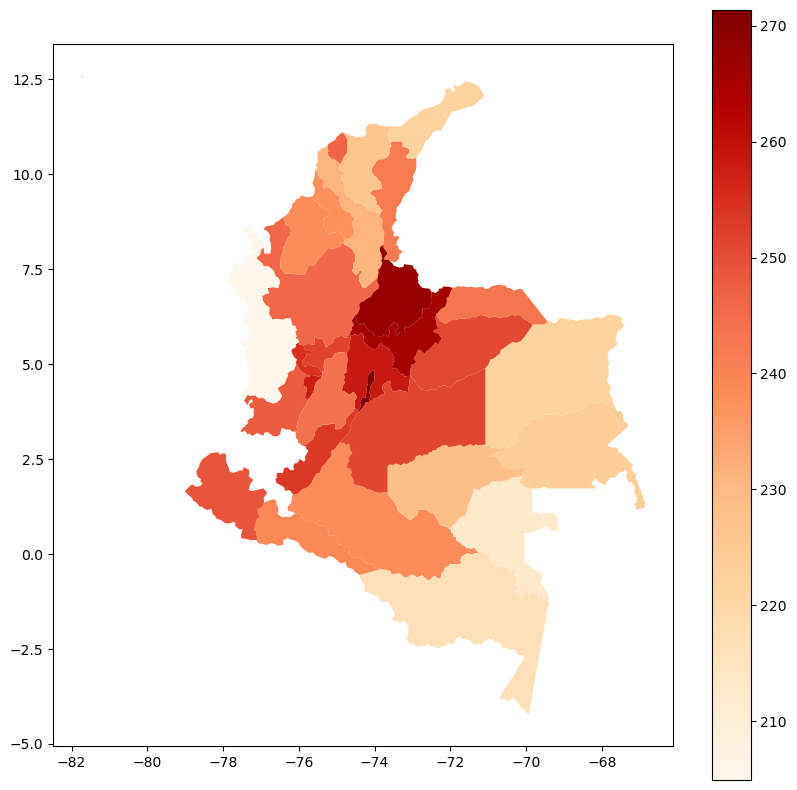

In [19]:
import geopandas as gpd
# Cargar los datos geoespaciales de los departamentos en Colombia desde el archivo GeoJSON
gdf_departamentos = gpd.read_file('deptos_sin_tildes.geojson')

# Cambiar BOGOTA, D.C. por BOGOTÁ
gdf_departamentos['DPTO_CNMBR'] = gdf_departamentos['DPTO_CNMBR'].replace('BOGOTA, D.C.', 'BOGOTÁ')
# cambiar ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA por SAN ANDRES
gdf_departamentos['DPTO_CNMBR'] = gdf_departamentos['DPTO_CNMBR'].replace('ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRES')
# cambiar NARINO por NARIÑO
gdf_departamentos['DPTO_CNMBR'] = gdf_departamentos['DPTO_CNMBR'].replace('NARINO', 'NARIÑO')

# revisar si coinciden los nombres de los departamentos
print(gdf_departamentos['DPTO_CNMBR'].unique())

# Agregar al archivo
gdf_departamentos = gdf_departamentos.merge(promedio_dep, left_on='DPTO_CNMBR', right_on='estu_depto_reside')

# Actualizar archivo con los cambios
gdf_departamentos.to_file('MapaDeptosPuntaje.geojson', driver='GeoJSON')

# Crear un mapa coroplético
gdf_departamentos.plot(column='punt_global', cmap='OrRd', legend=True, figsize=(10, 10))

# Visualización 1

In [29]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Cargar el archivo GeoJSON
geojson_file = 'mapaDeptosPuntaje.geojson'

# Cargar los datos en un DataFrame de GeoPandas
data = gpd.read_file(geojson_file)

# Eliminar las tildes de los nombres de los departamentos
data['DPTO_CNMBR'] = data['DPTO_CNMBR'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Resetear el índice
data = data.reset_index(drop=True)

# Crear el mapa cloroplético
fig = px.choropleth_mapbox(
    data_frame=data,
    geojson=data.geometry.__geo_interface__,
    locations=data.index,
    color='punt_global',
    color_continuous_scale='YlOrRd',
    mapbox_style="carto-positron",
    zoom=4,
    center={"lat": 4.5709, "lon": -74.2973},
    opacity=0.7,
    labels={'punt_global': 'Promedio de Puntaje'},
    hover_name='DPTO_CNMBR',
    title='<b>Promedio de Puntaje por Departamento</b>',
)

fig.update_layout(
    margin={"r": 10, "t": 50, "l": 10, "b": 10},
    legend=dict(
        title={'text': 'Puntaje'},
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        bgcolor='rgba(255, 255, 255, 0.5)'
    ),
    font=dict(
        family="Arial",
        size=12,
        color="#7f7f7f"
    ),
    autosize=False,
    width=800,
    height=600,
)

fig.show()


In [27]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Cargar el archivo GeoJSON
geojson_file = 'mapaDeptosPuntaje.geojson'

# Cargar los datos en un DataFrame de GeoPandas
data = gpd.read_file(geojson_file)

# Eliminar las tildes de los nombres de los departamentos
data['DPTO_CNMBR'] = data['DPTO_CNMBR'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Resetear el índice
data = data.reset_index(drop=True)

# Crear el mapa cloroplético
fig = px.choropleth_mapbox(data_frame=data,
                           geojson=data.geometry.__geo_interface__,
                           locations=data.index,
                           color='punt_global',
                           color_continuous_scale='YlOrRd',
                           mapbox_style="carto-positron",
                           zoom=4,
                           center={"lat": 4.5709, "lon": -74.2973},
                           opacity=0.7,
                           labels={'punt_global': 'Promedio de Puntaje'},
                           hover_name='DPTO_CNMBR',
                           title='Promedio de Puntaje por Departamento'
                          )

fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0},
                  legend=dict(
                      title={'text': 'Puntaje'},
                      orientation='h',
                      yanchor='bottom',
                      y=1.02,
                      xanchor='right',
                      x=1,
                      bgcolor='rgba(255, 255, 255, 0.5)'
                  )
                 )

fig.show()



## Exploración final

In [2]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State
import plotly.graph_objs as go
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos los datos del archivo CSV
csv_path = "Saber11.csv"

column_names = [
    "PERIODO", "ESTU_TIPODOCUMENTO", "ESTU_CONSECUTIVO", "COLE_AREA_UBICACION", "COLE_BILINGUE", "COLE_CALENDARIO",
    "COLE_CARACTER", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_DEPTO_UBICACION",
    "COLE_COD_MCPIO_UBICACION", "COLE_CODIGO_ICFES", "COLE_DEPTO_UBICACION", "COLE_GENERO", "COLE_JORNADA",
    "COLE_MCPIO_UBICACION", "COLE_NATURALEZA", "COLE_NOMBRE_ESTABLECIMIENTO", "COLE_NOMBRE_SEDE",
    "COLE_SEDE_PRINCIPAL", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_RESIDE_DEPTO",
    "ESTU_COD_RESIDE_MCPIO", "ESTU_DEPTO_PRESENTACION", "ESTU_DEPTO_RESIDE", "ESTU_ESTADOINVESTIGACION",
    "ESTU_ESTUDIANTE", "ESTU_FECHANACIMIENTO", "ESTU_GENERO", "ESTU_MCPIO_PRESENTACION", "ESTU_MCPIO_RESIDE",
    "ESTU_NACIONALIDAD", "ESTU_PAIS_RESIDE", "ESTU_PRIVADO_LIBERTAD", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONMADRE",
    "FAMI_EDUCACIONPADRE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_TIENEAUTOMOVIL", "FAMI_TIENECOMPUTADOR",
    "FAMI_TIENEINTERNET", "FAMI_TIENELAVADORA", "DESEMP_INGLES", "PUNT_INGLES", "PUNT_MATEMATICAS",
    "PUNT_SOCIALES_CIUDADANAS", "PUNT_C_NATURALES", "PUNT_LECTURA_CRITICA", "PUNT_GLOBAL"
]




df = pd.read_csv(csv_path)

#ELIMINAMOS COLUMNAS INNECESARIAS
columnas_eliminar = ['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION','COLE_BILINGUE','COLE_CALENDARIO','COLE_CARACTER','COLE_COD_DANE_ESTABLECIMIENTO','COLE_COD_DANE_SEDE','COLE_COD_DEPTO_UBICACION','COLE_COD_MCPIO_UBICACION','COLE_CODIGO_ICFES','COLE_GENERO','COLE_JORNADA','COLE_MCPIO_UBICACION','COLE_NATURALEZA', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 'COLE_SEDE_PRINCIPAL', 'ESTU_COD_DEPTO_PRESENTACION','ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_DEPTO_PRESENTACION', 'ESTU_DEPTO_RESIDE', 'ESTU_ESTADOINVESTIGACION', 'ESTU_ESTUDIANTE', 'ESTU_FECHANACIMIENTO','ESTU_MCPIO_PRESENTACION','ESTU_MCPIO_RESIDE', 'ESTU_NACIONALIDAD','ESTU_PAIS_RESIDE', 'ESTU_PRIVADO_LIBERTAD', 'DESEMP_INGLES','PUNT_INGLES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA']

df = df.drop(columnas_eliminar, axis=1)


#PRIEMRA TRANSFORMACION DE DATOS

mapping = {'No': 0, 'Si': 1}

df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].map(mapping)

df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].map(mapping)

df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].map(mapping)

df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].map(mapping)

#SEGUNDA TRANSOFRMACION DE DATOS
mappping = {'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6, 'Sin estrato': 0}

df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].map(mappping)


#TERCERA TRANSOFRMACION DE DATOS

mapppping = {'No sabe': 0,'No Aplica': 0,'Ninguno': 0, 'Primaria incompleta': 1, 'Primaria completa': 2, 'Secundaria (Bachillerato) incompleta': 3, 'Secundaria (Bachillerato) completa': 4, 'TÃ©cnica o tecnolÃ³gica incompleta': 5, 'TÃ©cnica o tecnolÃ³gica completa': 6, 'EducaciÃ³n profesional incompleta':7,'EducaciÃ³n profesional completa':8,'Postgrado':9}

df['FAMI_EDUCACIONMADRE'] = df['FAMI_EDUCACIONMADRE'].map(mapppping)
df['FAMI_EDUCACIONPADRE'] = df['FAMI_EDUCACIONPADRE'].map(mapppping)

#CUARTA TRANSFORMACION DE DATOS

mapeo = {'F': 0, 'M': 1}

df['ESTU_GENERO'] = df['ESTU_GENERO'].map(mapeo)

#QUINTA TRANSFORMACION DE DATOS

mappeo = {'Uno': 1, 'Dos': 2,'Tres':3, 'Cuatro':4,'Cinco':5, 'Seis o mas':6}

df['FAMI_CUARTOSHOGAR'] = df['FAMI_CUARTOSHOGAR'].map(mappeo)

#SEXTA TRANSFORMACION DE DATOS

mapppeo = {'1 a 2': 1, '3 a 4': 2,'5 a 6':3, '7 a 8':4,'9 o mÃ¡s':5}

df['FAMI_PERSONASHOGAR'] = df['FAMI_PERSONASHOGAR'].map(mapppeo)



# MATRIZ DE CORRELACION
corr_matrix = df.corr()
# GRAFICA MATRIZ DE CORRELACION


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'Saber11.csv'